### 문제정의
- 손 글씨 숫자(0~9)를 선형모델로 분류하는 모델을 만들어보자.
- 이미지 데이터의 형태를 이해해보자.

### 데이터 수집 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Data/digit_train.csv') 

data.head()

#  label : 정답
# 28 * 28 이미지 데이터 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 전체 데이터 갯수(크기)
data.shape

(42000, 785)

In [4]:
# 데이터 시각화
img0 = data.iloc[0, 1 : ] # 첫 번째 행의 label을 제외한 모든 컬럼을 가져와서 img0이라는 변수에 저장
img0 

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [5]:
img0.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
# 리스트 자료형을 28 * 28의 2차원으로 변화
img0_reshape = img0.values.reshape(28 , 28)

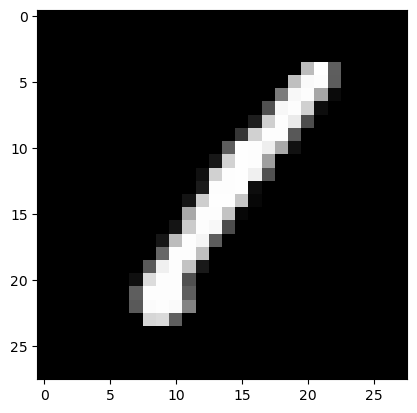

In [7]:
# 이미지 하나 그려보기 (행인덱스, 0번의 데이터)
# 컬러를 반영하지 않는 gray로 변경
plt.imshow(img0_reshape, cmap ='gray')

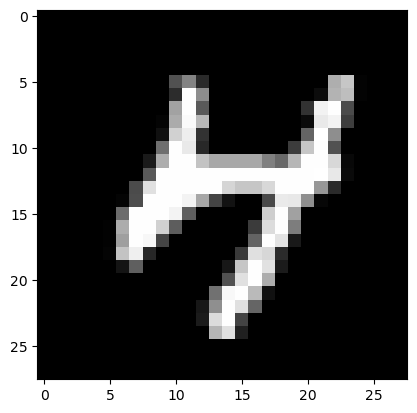

In [8]:
# 33번행의 데이터 가져와서 이미지 그려보기
img33 =data.iloc[32,1:]
plt.imshow(img33.values.reshape(28,28), cmap = 'gray')
plt.show()

In [9]:
data.iloc[32, 0]

4

### 학습을 위한 데이터 분리
- 학습 7 : 테스트 3
- random_state = 3 

In [10]:
data


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 1. X(문제), y(정답) 분리
X = data.iloc[:, 1:]
# X
y = data.iloc[:,0]
# y 

# 2. X, y ==> 7 : 3 : 학습용과 테스트용으로 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [12]:
# 3. 분리된 데이터 확인 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


### 모델 적용 
- knn 
- LogisticRegression
- SVM

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 모델 생성 
knn_model = KNeighborsClassifier()
logi_model = LogisticRegression()
svm_model = LinearSVC()


### 학습 및 평가 

In [14]:
# 학습
knn = knn_model.fit(X_train,y_train)

In [15]:
logi=logi_model.fit(X_train,y_train)

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
svm = svm_model.fit(X_train,y_train)

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
# 평가 : score 
print('KNN : ', knn.score(X_test,y_test))
print('Logistic : ', logi.score(X_test,y_test))
print('SVM : ', svm.score(X_test,y_test))


KNN :  0.9638888888888889
Logistic :  0.9113492063492064
SVM :  0.8653174603174603


### 데이터 스케일링
- 이미지 데이터 : 픽셀정보(0 ~ 255)
- 1. MintMaxScaler를 사용하여 0 ~ 1사이의 값으로 모든 픽셀을 조정
- 2. 스케일링의 효과 확인하기 
        - 학습(연산) 속도가 조금 빨라짐
        - 거리기반의 knn모델은 별다른 변화가 없었음.
- KNN : 데이터가 많을수록 속도가 느려짐. --> 모든 데이터에 대해서 거리를 계산하기 때문에

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 학습
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 분류평가 지표
- 회귀 : 오차를 기반으로하는 MSE, R2score
- 분류 : 맞춘 개수를 기반으로 평가지표 적용
    1. 정확도(Accuracy) : 전체 데이터에서 정확히 맞춘 비율
    2. 재현율(Recall) : 실제 양성중에서 정확히 맞춘 비율 
    3. 정밀도(precision) : 모델이 예측한 양성중에서 정확히 맞춘 비율
    4. f1-socre() : 재현율과 정밀도의 조화평균
- SVM (support vector marchine) : 초평면(결정경계)을 기준으로 소프트벡터(가장 가까운 데이터)의 마진(초평면과의 거리)이 클수록 좋은 결정 결계

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
pre = logi_model.predict(X_test_scale)

In [31]:
# confusion_matrix(실제정답, 예측값)
confusion_matrix(y_test,pre)

array([[1175,    0,    1,    2,    1,   13,   12,    1,    6,    3],
       [   0, 1325,    4,    5,    1,    6,    3,    8,    9,    1],
       [   8,   18, 1076,   20,   11,   11,   12,   22,   30,    5],
       [   3,    6,   28, 1160,    1,   45,    5,   13,   15,   11],
       [   4,    5,   13,    1, 1178,    0,   12,    8,   10,   45],
       [  13,    4,   10,   48,   14, 1009,   27,    8,   29,    6],
       [  14,    4,    9,    0,   11,   18, 1166,    1,    4,    0],
       [   3,    5,   21,    7,    7,    2,    2, 1221,    1,   44],
       [  16,   24,   17,   36,   11,   36,    9,    4, 1077,   20],
       [   6,    5,    2,   12,   36,   11,    0,   44,   13, 1161]],
      dtype=int64)

In [32]:
# 손글씨 데이터는 (0 ~ 9 : 10)  10 * 10 의 오차행렬도로 계산하는 게 쉽지 않음
# report 형태(분리평가지표 4가지)로 확인

from sklearn.metrics import classification_report

In [56]:
pre = logi_model.predict(X_test_scale)
print(classification_report(y_test, pre))

# support: 데이터 갯수 
# accuracy : 현재 내 모델이 몇 %의 정확도로 예측하고 있는 지, 각 숫자가 나올 확률은 모두 다름.
# f1-score : 정밀도와 재현율을 고려한 수치
#            f1-sore 높다면 두 분류지표(정밀도, 재현율)도 높다.
#  macro avg : 재현율, 정밀도, f1-score를 구해서 각각 평균을 낸 것
#              현재 모델을 사용해서 분류할 때 각 클래스(숫자)에 대해서 얼마나 평균적으로 잘 동작하는 지 
#              알고 싶을 때 사용하는 수치값
# weighted avg : 가중평균, 개별치(0~9) 각각의 중요도, 빈도(영향)에 따라 가중치를 곱해서 구해지는 평균 값

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1214
           1       0.95      0.97      0.96      1362
           2       0.91      0.89      0.90      1213
           3       0.90      0.90      0.90      1287
           4       0.93      0.92      0.93      1276
           5       0.88      0.86      0.87      1168
           6       0.93      0.95      0.94      1227
           7       0.92      0.93      0.92      1313
           8       0.90      0.86      0.88      1250
           9       0.90      0.90      0.90      1290

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



### 예측하기 

In [48]:
img10 = X_test_scale[20] # 10번째 데이터

In [49]:
logi_model.predict([img10])

array([1], dtype=int64)

In [50]:
svm_model.predict([img10])

array([1], dtype=int64)

In [51]:
# 실제 정답 확인
y_test.iloc[20]

1

In [53]:
logi_model.predict_proba(X_test_scale[20:21]) # 슬라이싱 이용해서 10번쩨 데이터 추출

array([[3.30584700e-11, 9.93596709e-01, 9.35889522e-06, 4.36457078e-03,
        4.97592907e-07, 5.53871547e-05, 3.80057866e-07, 3.54693245e-04,
        2.10842409e-04, 1.40756049e-03]])

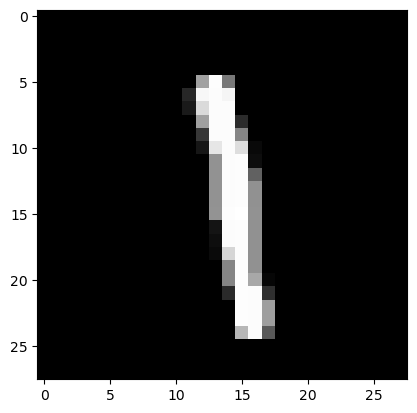

In [54]:
img20 = X_test.iloc[20]
plt.imshow(img20.values.reshape(28, 28), cmap='gray')
plt.show()

#### ROC 곡선
- 임계값을 0 ~ 1 까지 변화시켜가면서 
- x축 : 가짜 양성의 비율(FPR), y축 : 진짜 양성의 비율(TPR)을 표시한 곡선 
- 임계값 변환에 따라서 음성/양성 분류여부가 달라짐. => ROC 곡선도 달라짐
- ROC 곡선 아래 면적 : AUC(Area Under the Curve)
- ACU 값이 1에 가까울수록 분류 모델의 성능이 좋다고 평가 
